# ニューラルネットワークの学習理論(損失編)


## 損失関数(loss function)

「正解値」と「ニューラルネットの出力」の**誤差**を「**損失**」という。

ニューラルネットワークの学習では、的確な推論を行うために最適な各パラメータ（重みやバイアス）を決定する。

このとき、正解と出力の損失(誤差)を求めるため、「**損失関数（loss function）**」という。

**損失関数**では、

完全に正解 = $0$

完全に不正解 = $1$

として $0$ から $1$ までの間で判定する。

### データを用意
「正解データ」と「出力」のArrayを用意する

In [ ]:
import numpy as np

#正解データ (one-hot表現)
t = np.array([0, 0, 0, 1, 0])
#ニューラルネットワークの出力　(y1: 正解, y2: 不正解)
y1 = np.array([0.1, 0.05, 0.0, 0.7, 0.15])
y2 = np.array([0.5, 0.2, 0.0, 0.1, 0.2 ])

### 2乗和誤差(sum of squared error)

$E = \frac{1}{2} \displaystyle \sum_{k}(y_{k}-t_{k})^2$ 

$E$ : 誤差

$y_{k}$ : 出力

$t_{k}$ : 正解データ

$k$ : データの次元数

---

出力 $y_{k}$ と正解データ $t_{k}$ の差の２乗の総和を求める

総和が小さければ小さいほど、出力と正解の誤差が少ない。

In [13]:
#２乗和誤差（sum of squared error）の実装
def sum_squared_error(y, t):
    # ２乗和誤差 を実装してください
    # Σ は、np.sum() です。
    return 0.5 * np.sum((y - t) ** 2)

#２乗和誤差による損失関数の計算
y1_loss = sum_squared_error(y1, t)
y2_loss = sum_squared_error(y2, t)

print('２乗和誤差による損失関数の計算結果:')
print('y1(出力が正解の場合) : {:.4f}'.format(y1_loss))
print('y2(出力が不正解の場合) : {:.3f}'.format(y2_loss))

２乗和誤差による損失関数の計算結果
y1(出力が正解の場合) : 0.0625
y2(出力が不正解の場合) : 0.570


### 交差エントロピー誤差

$E = - \displaystyle \sum_{k} t_k log y_k$

$E$ : 誤差

$y_{k}$ : 出力

$t_{k}$ : 正解データ

$k$ : データの次元数

---

各要素における「出力の自然対数 $log y_k$ 」と「正解データ $t_k$ 」との積を計算する。

小さければ小さいほど、出力と正解の誤差が少ない。

In [15]:
#交差エントロピー誤差（cross entropy error）の実装
#log(0)の場合に負の無限大に発散することを防ぐため、微小値deltaを導入している
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

#交差エントロピー誤差による損失関数の計算
y1_loss = cross_entropy_error(y1, t)
y2_loss = cross_entropy_error(y2, t)

print('交差エントロピー誤差による損失関数の計算結果')
print('y1(出力が正解の場合) : {:.4f}'.format(y1_loss))
print('y2(出力が不正解の場合) : {:.3f}'.format(y2_loss))

交差エントロピー誤差による損失関数の計算結果
y1(出力が正解の場合) : 0.3567
y2(出力が不正解の場合) : 2.303


## $-logy$ のグラフ

自然対数 $logx$ は、$y$ が１の時に「０」となり、逆に $y$ が「０」に近づくと、小さくなる

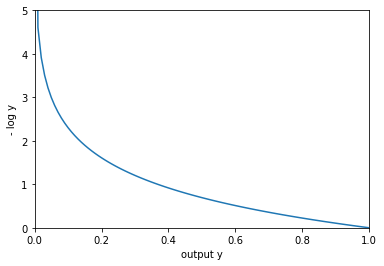

In [16]:
import matplotlib.pyplot as plt
y = np.arange(0, 1.01, 0.01)
delta = 1e-7
loss = -np.log(y + delta)
plt.plot(y, loss)
plt.xlim(0, 1)
plt.xlabel('output y')
plt.ylim(0, 5)
plt.ylabel('- log y')
plt.show()

## ニューラルネットと勾配降下法(Gradient Discent)

勾配法（勾配降下法）
勾配法には以下の２種類がある。

最小値を求めるのが「**勾配降下法**」

最大値を求めるのが勾配上昇法

機械学習では基本的には、損失関数を最小化するように重みを更新するため「**勾配降下法**」が利用される。

「**損失関数(loss function)**」では、「正解値」と「出力」の**損失**(誤差)を求めたが、**勾配降下法**では、この損失を小さくしていき、正解率を高める操作をする。


## 最急降下法で最小の損失を探索


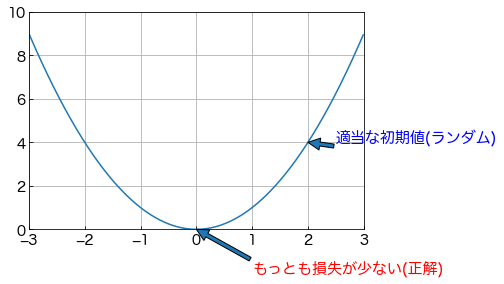

In [98]:
import matplotlib.pyplot as plt
from matplotlib import animation as ani
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# -3 ~ 3 まで 0.1 刻み
x = np.arange(-3, 3, 0.01)
y = x**2

fig, ax = plt.subplots()
ax.grid()
ax.set_xlim(-3, 3)
ax.set_ylim(0, 10)
plt.grid()

ax.annotate("もっとも損失が少ない(正解)", xy = (0, 0), size = 15, xytext = (1, -2),
            color = "red", arrowprops = dict())

ax.annotate("適当な初期値(ランダム)", xy = (2, 4), size = 15, xytext = (2.5, 4),
            color = "blue", arrowprops = dict())

plt.plot(x, y)
plt.grid()
plt.show()

２次関数 $f(x)=x^2$ の最小値を**勾配降下法**で求める。

勾配(傾き)は、導関数 $f'(x)=2x$ で与えられる。

1. **初期値**(初期パラメータ) $x_0$ を適当(ランダム)に決める。今回は $2$ にする。 

2. 初期値の勾配は、 $f'(x_0) = 2 \times x_0$ なので $4$ になる。

3. $x$軸の負の方向に点を移動させたい(降下させる)。そこで、「**学習率(learning late, ゲイン)**」と呼ばれる正の係数 $\alpha$ 用意し、初期値の勾配に掛けた値を $x_0$ から引くと原点 $0$ に近づく $x_1 = 1.6$ が得られる。

「学習率 $\alpha$」を $0.1$ とすると、

$x_1 = x_0 - \alpha f'(x_0)$

$x_1 = x_0 - 4 \times \alpha$

$x_1 = 2 - 0.4 = 1.6$

4. これを繰り返す。

$x_1$ の勾配は、$f'(x_1) = 2 \times 1.6 = 3.2$

$x_2 = x_1 - \alpha f'(x_1)$

$x_2 = x_1 - 0.32 \times \alpha$

$x_2 = 1.6 - 0.32 = 1.28$

---

一般化すると、

$x_k = x_k-1 - \alpha f'(x_k-1)$

$x_k$ : 最小値

$k$ : 更新回数

「**学習率(learning rate)**」 は、大きくすればするほど、1step の移動距離を増やせるが、大きすぎると最小値を超えて反復し、かえって収束に時間がかかる場合があるため、注意が必要。


「学習率 $\alpha$」を $0.8$ にしてしまうと、

$x_1 = x_0 - \alpha f'(x_0)$

$x_1 = x_0 - 4 \times \alpha$

$x_1 = 2 - 3.2 = -1.2$

$x_1$ の勾配は、$f'(x_1) = 2 \times -1.2 = -2.4$

$x_2 = x_1 - \alpha f'(x_1)$

$x_2 = x_1 - 3.2 \times \alpha$

$x_2 = 1.6 - 3.2 = -1.6$


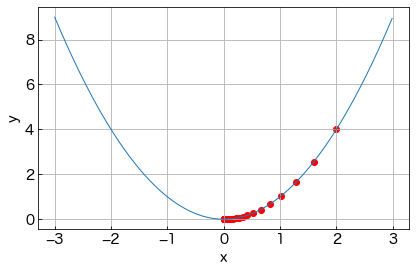

In [99]:
import numpy as np
from matplotlib import pyplot as plt

# グラフプロット用基準関数
def f(x):
    y = x ** 2
    return y

# 基準関数の導関数
def df(x):
    dy = 2 * x
    return dy

lr = 0.1                           # 学習率
max_iteration = 1000                # 最大反復回数
x0 = 2                             # 初期値
x_pred = [x0]                       # 描画用軌跡リスト(初期値をプリセット)

# 最大反復回数まで計算する
for i in range(max_iteration):
    x0 = x0 - lr * df(x0)          # 勾配降下法
    x_pred.append(x0)               # 軌跡をリストに追加

x_pred = np.array(x_pred)           # 描画用にnumpy配列変換

# 基準関数の表示用
x = np.arange(-3, 3, 0.01)
y = f(x)

fig = plt.figure()
ax1 = fig.add_subplot(111)

# 軸のラベルを設定する。
ax1.set_xlabel('x')
ax1.set_ylabel('y')
plt.grid()

# データプロットの準備。
ax1.plot(x, y, lw=1)
ax1.scatter(x_pred, f(x_pred), color='red')

# グラフを表示する。
fig.tight_layout()
plt.show()
plt.close()

学習率の選び方としては、各最適化アルゴリズムの論文に様々なデータセットを試して良い結果が出た値が載ってあるのでそれを参考にする。

※ 数値はあくまでも目安でデータセットによって最適な値は変わる。論文にある値を指定しておくと、変えなくてもよい場合が多い。

SGD: 0.01

RMSprop : 0.001

Adagrad : 0.01

Adadelta : 1.0

Adam : 0.001

Adamax : 0.002

Nadam : 0.002



## ミニバッチ(mini batch)
訓練データの中からランダムにデータを抜き出して学習をさせるテクニックを「**ミニバッチ**」という。
ミニバッチを利用するということは、一部のデータを全体の近似として利用することになる。

### ミニバッチにおける損失関数の計算について
損失関数の計算は抜き出した訓練データ１つ１つに対して求める必要はなく、最終的な損失の値を訓練データの数で割ることで平均の損失値を求める。

全ての訓練データで、損失の値を0にすることのため、全体として損失最小化をすれば良いため、平均を求める形になる。

## 確率的勾配降下法(SGD, stochastic gradient descent)


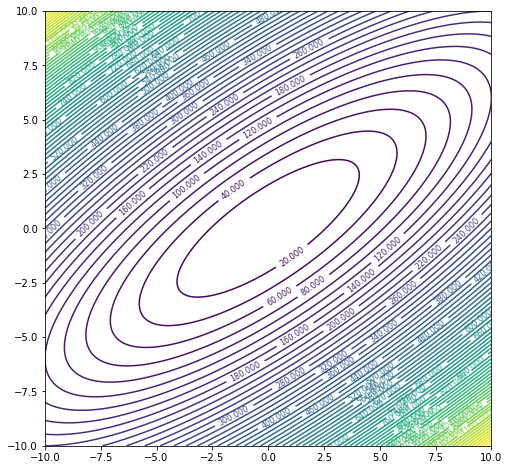

In [3]:
# グラフの範囲を指定
x_low  = -10
x_high = 10
y_low  = -10
y_high = 10

# 格子状に分割した各座標を作成
X = np.linspace(x_low, x_high, 1000)
Y = np.linspace(y_low, y_high, 1000)
X, Y = np.meshgrid(X, Y)

# 関数に従い曲面を作成
Z = (3 * X ** 2) + (5 * Y ** 2) - (6 * X * Y)

# 曲面の描画
plt.figure(figsize=(8, 8))
interval = np.arange(np.min(Z), np.max(Z), 20)
counter_plane = plt.contour(X, Y, Z, interval)
plt.clabel(counter_plane, inline=1, fontsize=8)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
plt.close()

## 勾配の計算
目的関数の勾配を計算する関数を定義

In [4]:
def get_grad_vec(x, y):
    grad_x = 6 * x - 6 * y
    grad_y = 10 * y - 6 * x
    return [grad_x, grad_y]

In [6]:
# 初期値の設定
init_x = 2.5
init_y = 7.5

# 学習率・終了条件の設定
lr = 0.05
epsilon = 0.001

list_xs   = []
list_ys   = []
list_nxs  = []
list_nys  = []
list_diff = []

xs = init_x
ys = init_y
step = 0

for i in range(100):

    grad_vec = get_grad_vec(xs, ys)
    n_xs = xs - lr * grad_vec[0]
    n_ys = ys - lr * grad_vec[1]

    list_xs.append(xs)
    list_ys.append(ys)
    list_nxs.append(n_xs)
    list_nys.append(n_ys)

    # judge convergence
    diff = np.sqrt(grad_vec[0]**2 + grad_vec[1]**2)
    list_diff.append(diff)
    
    # 終了判定
    step += 1
    if diff < epsilon:       
        break

    xs = n_xs
    ys = n_ys
    print(step, ":", diff)

1 : 67.08203932499369
2 : 21.213203435596427
3 : 10.478549517943787
4 : 8.402142583888947
5 : 7.584579091815181
6 : 6.939126976788941
7 : 6.356934619767614
8 : 5.824322112905503
9 : 5.336398792098806
10 : 4.889356142171138
11 : 4.4797638025201385
12 : 4.104483976418354
13 : 3.7606421839572075
14 : 3.445604786959892
15 : 3.1569587765300295
16 : 2.8924932872270808
17 : 2.650182662774745
18 : 2.4281709406506566
19 : 2.2247576364593544
20 : 2.0383847191820554
21 : 1.8676246775390346
22 : 1.7111695860595064
23 : 1.5678210871112592
24 : 1.4364812121580395
25 : 1.3161439719407193
26 : 1.2058876511677736
27 : 1.1048677486967409
28 : 1.0123105091324685
29 : 0.9275069962978086
30 : 0.8498076631829291
31 : 0.7786173767820843
32 : 0.71339085971094
33 : 0.6536285136897858
34 : 0.5988725929028987
35 : 0.5487036979241342
36 : 0.5027375633542073
37 : 0.46062211456477375
38 : 0.42203477100563463
39 : 0.38667997541992044
40 : 0.3542869300424394
41 : 0.3246075224417481
42 : 0.29741442511906335
43 : 0.272

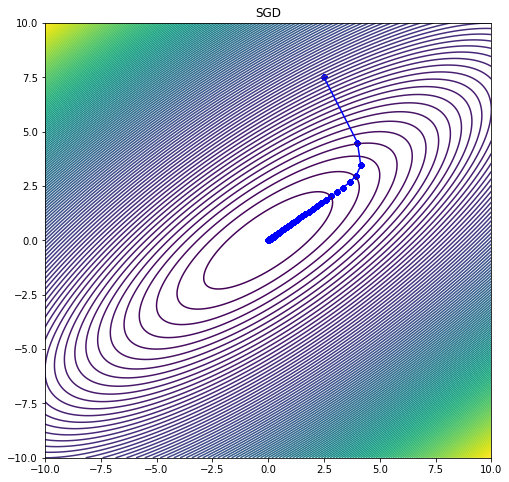

In [24]:
def plot(xs, ys, nxs, nys, txt):
  plt.figure(figsize=(8, 8))
  plt.title(txt)
  interval = np.arange(np.min(Z), np.max(Z), 10.)
  plt.contour(X, Y, Z, interval)
  for i in range(len(xs) - 1):
    plt.plot([xs[i-1], nxs[i-1]], [ys[i-1], nys[i-1]], c='b')
    plt.scatter(xs, ys, s=20, c="b")
  
  plt.xlim(-10, 10)
  plt.ylim(-10, 10)
  plt.show()
  plt.close()

# 結果の描画
plot(list_xs, list_ys, list_nxs, list_nys, 'SGD')

## 参考文献
[損失関数とは？ニューラルネットワークの学習理論【機械学習】](https://rightcode.co.jp/blog/information-technology/loss-function-neural-network-learning-theory)